<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/Harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [6]:
!ls

Angie.ipynb  Harris.ipynb  Samuel.ipynb   Timothy.ipynb
desktop.ini  Isaac.ipynb   Test_data.csv  Train_data.csv


## Import necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# SVM
from sklearn.svm import SVC

## Intrusion Data

In [8]:
intrusion_data = pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [9]:
intrusion_data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [10]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

normal     53.385996
anomaly    46.614004
Name: class, dtype: float64


# Preprocessing

In [11]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [12]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
0        23168
1          374
2          165
3          102
4           75
         ...  
12892        1
584          1
10774        1
3735         1
7787         1
Name: duration, Length: 758, dtype: int64
------------
Counts for protocol_type:
tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64
------------
Counts for service:
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
pm_dump         3
red_i           3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64
------------
Counts for flag:
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64
------------
Counts for src_bytes:
0        9866
8         738
1         480
44        467
45        416
         ... 
1464        1
1249        1
1396    

#Attribute Analyses and Input selection

In [13]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
intrusion_data = pd.read_csv('Train_data.csv')

In [15]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [16]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [17]:
from sklearn.feature_selection import mutual_info_classif

X = int_data_no_strings.drop('class_label', axis=1)
y = int_data_no_strings['class_label']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                   0.563481
dst_bytes                   0.434699
diff_srv_rate               0.359500
same_srv_rate               0.358981
dst_host_srv_count          0.328060
dst_host_same_srv_rate      0.303559
dst_host_diff_srv_rate      0.284740
dst_host_serror_rate        0.283228
logged_in                   0.276506
dst_host_srv_serror_rate    0.276165
dtype: float64


In [18]:
int_corr = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [19]:
intrusion_data_right['class_label'].value_counts()

0    13449
1    11743
Name: class_label, dtype: int64

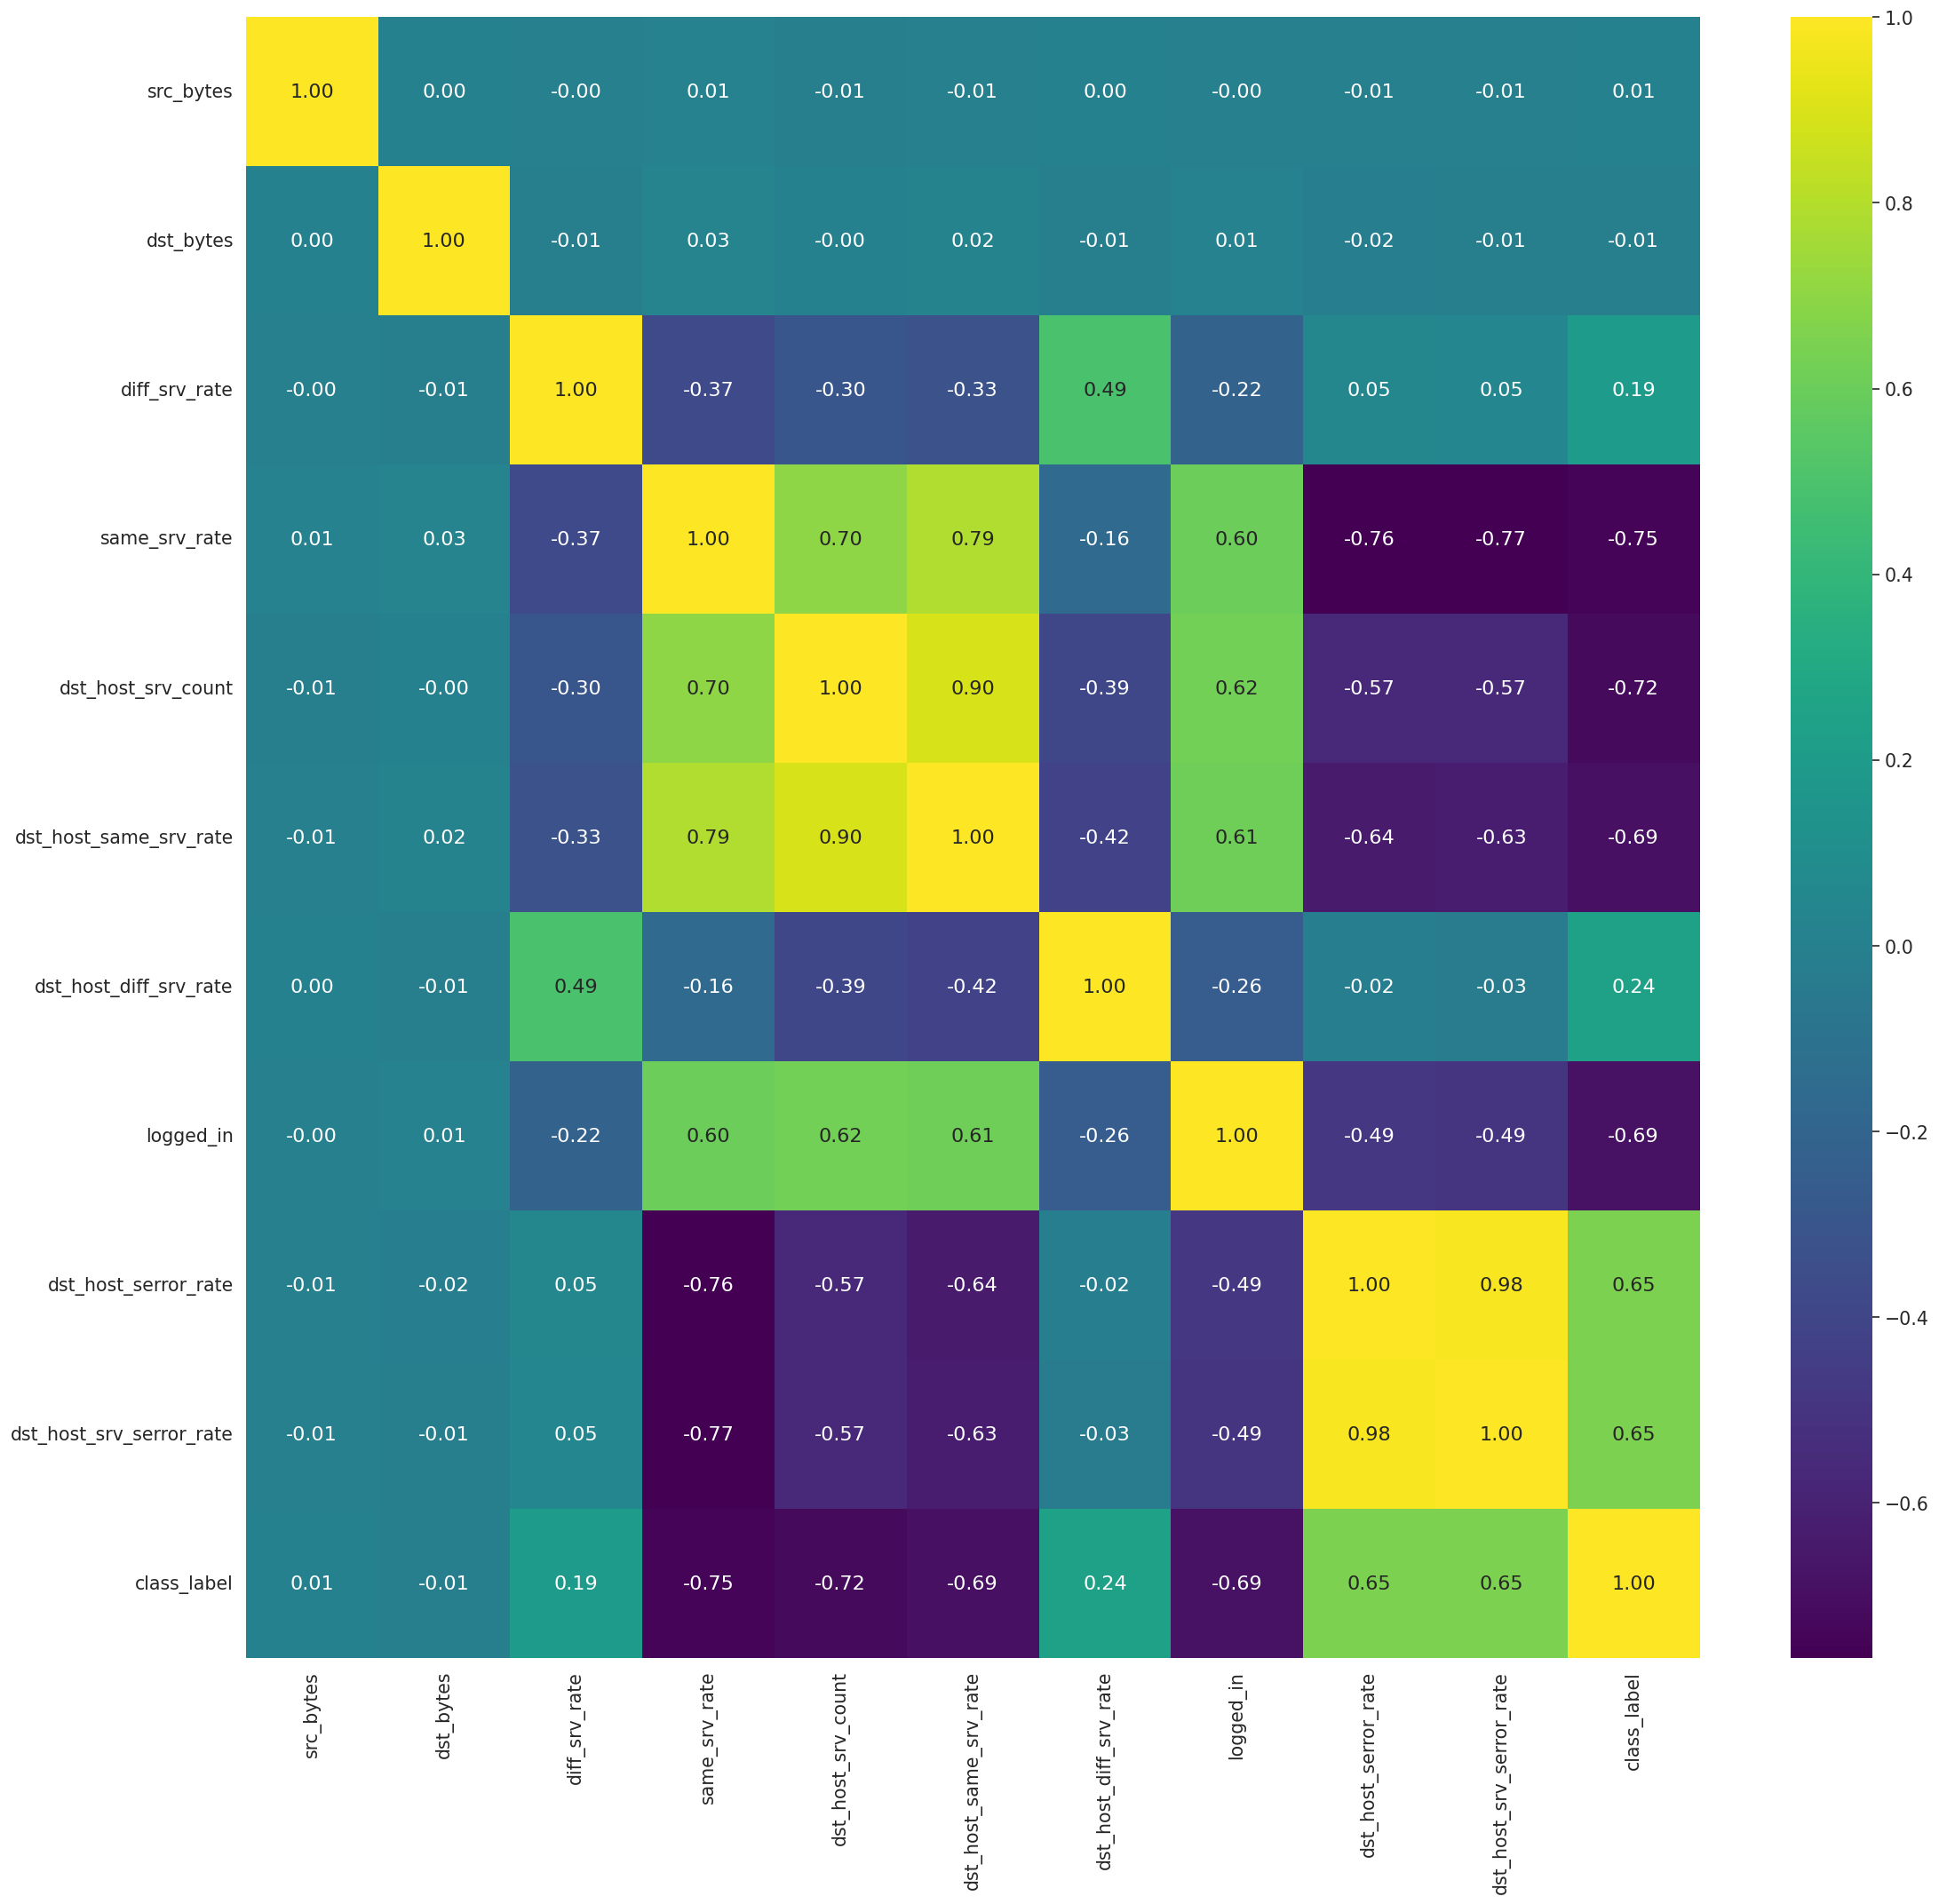

In [20]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

# Splitting Data

In [21]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count', 'class_label']]

In [22]:
top_10_info_gain

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
0,491,0,0.00,1.00,25,0
1,146,0,0.15,0.08,1,0
2,0,0,0.07,0.05,26,1
3,232,8153,0.00,1.00,255,0
4,199,420,0.00,1.00,255,0
...,...,...,...,...,...,...
25187,0,0,0.07,0.07,7,1
25188,334,0,0.00,1.00,39,1
25189,0,0,0.07,0.07,13,1
25190,0,0,0.06,0.14,20,1


In [23]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = top_10_info_gain[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count']]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.410255e-19,-5.641019e-19,-4.195508e-18,-1.452562e-17,-6.035890e-17,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.502538e+00,-1.039933e+00,0.000000
25%,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.297820e+00,-9.495537e-01,0.000000
50%,-1.007427e-02,-3.930979e-02,-3.492819e-01,7.721087e-01,-4.886186e-01,0.000000
75%,-9.976793e-03,-3.334045e-02,-1.323494e-02,7.721087e-01,1.264742e+00,1.000000
max,1.583257e+02,5.795287e+01,5.251501e+00,7.721087e-01,1.264742e+00,1.000000


In [24]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [26]:
y_train

17436    0
21918    1
4882     0
7102     0
20467    0
        ..
24298    0
17508    0
5292     0
979      0
20411    0
Name: class_label, Length: 17634, dtype: int64

In [27]:
y_train.value_counts()

0    9389
1    8245
Name: class_label, dtype: int64

# xgBoost - benchmark and GA Accuracy measure

In [28]:
top_10_info = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [29]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_base = top_10_info.drop(["class_label"], axis=1)
y_base = top_10_info["class_label"]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3)

In [30]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X_base = X_test_base[-2500:]
futureSample_y_base = y_test_base[-2500:]

# Remove the last two hundred samples from the test dataset
X_test_base = X_test_base[0:-2500]
y_test_base = y_test_base[0:-2500]

In [31]:
X_test_base

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,logged_in,dst_host_serror_rate,dst_host_srv_serror_rate
8332,75,919,0.00,1.00,19,0.28,0.05,1,0.25,0.84
20270,225,526,0.00,1.00,255,1.00,0.00,1,0.00,0.00
13166,0,0,0.06,0.07,19,0.07,0.05,0,1.00,1.00
21169,0,0,0.05,0.13,13,0.05,0.07,0,1.00,1.00
6181,0,0,0.05,0.07,17,0.07,0.06,0,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...
9748,0,0,0.05,0.11,14,0.05,0.07,0,1.00,1.00
25138,0,0,0.08,0.03,3,0.01,0.08,0,1.00,1.00
11405,226,1968,0.00,1.00,255,1.00,0.00,1,0.00,0.00
14017,315,261,0.00,1.00,255,1.00,0.00,1,0.00,0.00


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
xgBoostClassifier = GradientBoostingClassifier()
xgBoostClassifier.fit(X_test_base, y_test_base)

GradientBoostingClassifier()

## Measure Gradient Boost's performance

In [33]:
# Predict the class labels of samples in the test dataset
y_pred_xgb = xgBoostClassifier.predict(X_test_base)

In [34]:
score_test = accuracy_score(y_test_base, y_pred_xgb)
print (score_test)

0.9938710952945828


In [35]:
precision_test = precision_score(y_test_base, y_pred_xgb, average='macro')
print (precision_test)

0.9938803053122923


In [36]:
recall_test = recall_score(y_test_base, y_pred_xgb, average='macro')
print (recall_test)

0.9937896628687608


In [37]:
f1_test =  f1_score(y_test_base, y_pred_xgb, average='macro')
print(f1_test)

0.9938346282286483


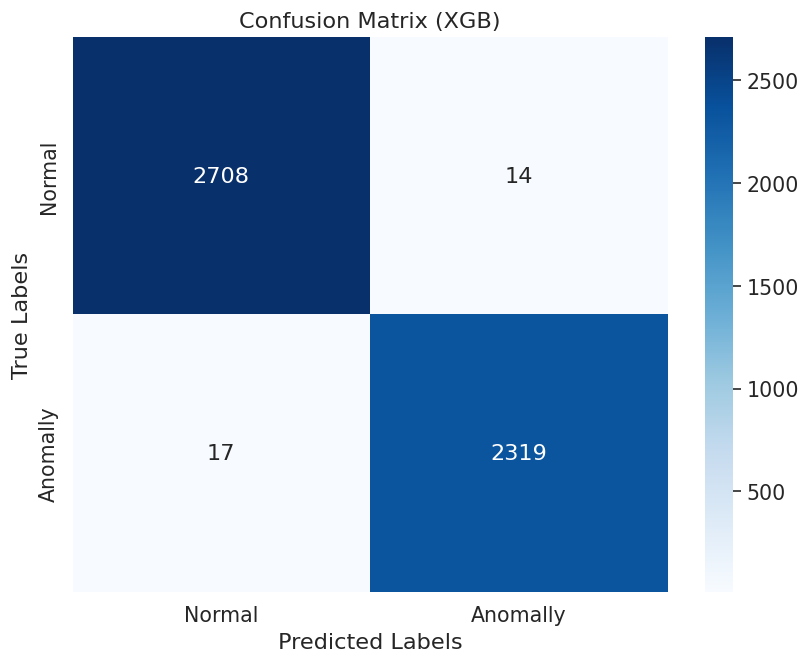

In [38]:
mat = confusion_matrix(y_test_base, y_pred_xgb)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

# Genetic Algorithm - Feature Selection (Using Models)

In [49]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [50]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train_base.iloc[:,chromosome],y_train_base)
        predictions = logmodel.predict(X_test_base.iloc[:,chromosome])
        scores.append(accuracy_score(y_test_base,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [51]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [52]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [53]:
def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = np.random.randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [54]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [55]:
z = X_base.shape[1]
z

10

In [56]:
logmodel = xgBoostClassifier
chromo_df_bc, score_bc = generations(X_base,y_base,size=80, n_feat=X_base.shape[1], n_parents=64,
                                  mutation_rate=0.20,n_gen=5, X_train = X_train_base,
                                  X_test = X_test_base, Y_train = y_train_base, Y_test = y_test_base)

Best score in generation 1 : [0.9914986160537762]
Best score in generation 2 : [0.9914986160537762]
Best score in generation 3 : [0.9911032028469751]
Best score in generation 4 : [0.9914986160537762]
Best score in generation 5 : [0.9916963226571768]


In [58]:
len(int_data_no_strings.columns)

39

In [57]:
selected_features = X_base.columns[chromo_df_bc[4]]
print(selected_features.tolist())

['src_bytes', 'dst_bytes', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']


# Support Vector Machine

In [58]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = top_10_info[['src_bytes', 'dst_bytes', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,src_bytes,dst_bytes,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,dst_host_serror_rate,dst_host_srv_serror_rate,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.410255e-19,-5.641019e-19,-4.195508e-18,-6.035890e-17,-6.233326e-17,4.371790e-17,-6.924351e-17,-1.231505e-16,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.039933e+00,-1.157831e+00,-8.076258e-01,-6.418041e-01,-6.273647e-01,0.000000
25%,-1.009252e-02,-3.930979e-02,-3.492819e-01,-9.495537e-01,-1.046456e+00,-8.076258e-01,-6.418041e-01,-6.273647e-01,0.000000
50%,-1.007427e-02,-3.930979e-02,-3.492819e-01,-4.886186e-01,-2.180896e-02,-8.076258e-01,-6.418041e-01,-6.273647e-01,0.000000
75%,-9.976793e-03,-3.334045e-02,-1.323494e-02,1.264742e+00,1.069663e+00,1.238197e+00,1.603834e+00,1.614454e+00,1.000000
max,1.583257e+02,5.795287e+01,5.251501e+00,1.264742e+00,1.069663e+00,1.238197e+00,1.603834e+00,1.614454e+00,1.000000


In [59]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

## Train SVM

In [61]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

SVC(probability=True)

## Measure SVM's performance

In [62]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [63]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

0.9039145907473309


In [64]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

0.9035279738146864


In [65]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

0.9035674956899745


In [66]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

0.9035475919739528


In [67]:
X_test.shape

(5058, 8)

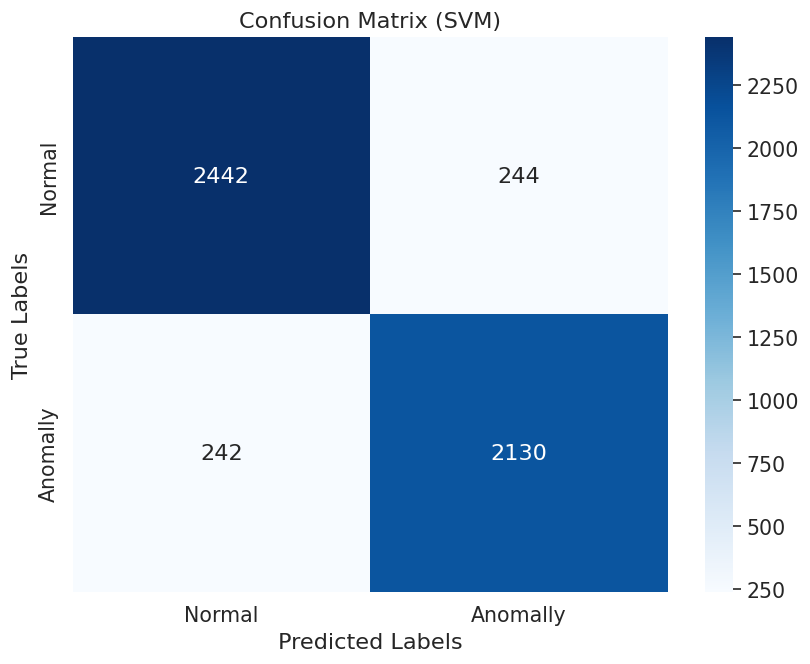

In [68]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM)")
plt.show()

In [69]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2686
           1       0.90      0.90      0.90      2372

    accuracy                           0.90      5058
   macro avg       0.90      0.90      0.90      5058
weighted avg       0.90      0.90      0.90      5058



## ROC Curve

The AUC is 0.961


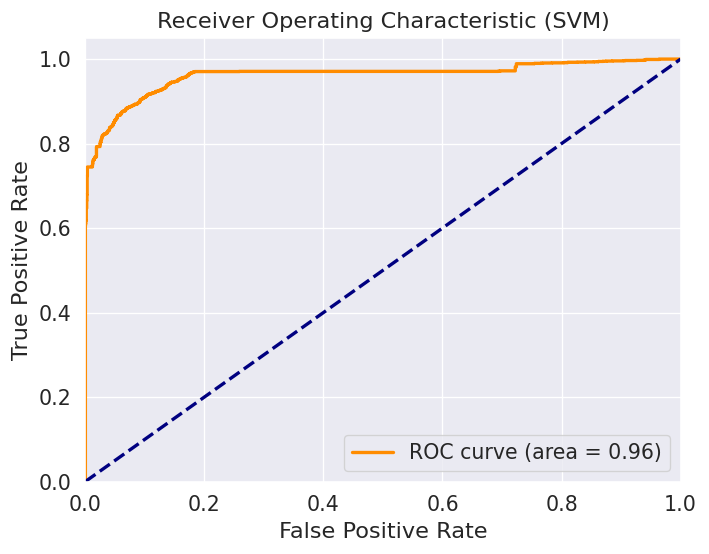

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

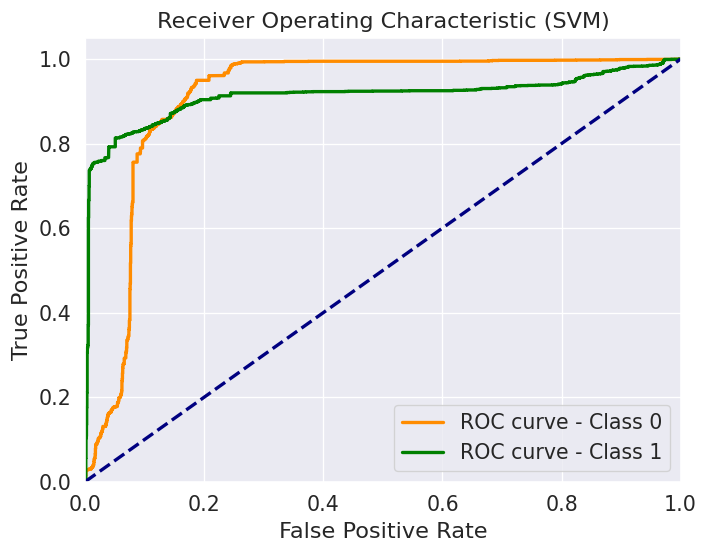

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [71]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [72]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.904
